In [4]:
import numpy as np
import sympy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import fsolve,root

x = sp.symbols('x')

M_p=1

def potencial_4(x):

    return x**4

def potencial_2(x):

    return x**2

# Esta función y las siguientes son para calcular phi=phi(N) en función de los parámetros del problema y phi(N=0)
# Lo hago de esta forma y no con la expresión simbólica anterior porque no consigo que funcione bien con odeint

def evol_phi_4(phi,N):
    
    derivada_1 = sp.diff(potencial_4(x),x)
    
    V=potencial_4(phi[0])
    Vd=derivada_1.evalf(subs={x: phi[0]})
    
    return sp.sqrt((M_p*Vd/V)**2)

def evol_phi_2(phi,N):
    
    derivada_1 = sp.diff(potencial_2(x),x)
    
    V=potencial_2(phi[0])
    Vd=derivada_1.evalf(subs={x: phi[0]})
    
    return sp.sqrt((M_p*Vd/V)**2)

In [8]:
N_60=np.linspace(0,60,1000)
N_50=np.linspace(0,50,1000)

phi_0_4=np.sqrt(8)
phi_N_4_60=odeint(evol_phi_4,phi_0_4,N_60)
print(phi_N_4_60[-1][0])
phi_N_4_50=odeint(evol_phi_4,phi_0_4,N_50)
print(phi_N_4_50[-1][0])

phi_0_2=np.sqrt(2)
phi_N_2_60=odeint(evol_phi_2,phi_0_2,N_60)
print(phi_N_2_60[-1][0])
phi_N_2_50=odeint(evol_phi_2,phi_0_2,N_50)
print(phi_N_2_50[-1][0])

22.090722595308318
20.199010391969537
15.556349575783933
14.212670787821601


In [21]:
print(1-24/phi_N_4_60[-1][0]**2,128/phi_N_4_60[-1][0]**2)
print(1-24/phi_N_4_50[-1][0]**2,128/phi_N_4_50[-1][0]**2)
print(1-8/phi_N_2_60[-1][0]**2,32/phi_N_2_60[-1][0]**2)
print(1-8/phi_N_2_50[-1][0]**2,32/phi_N_2_50[-1][0]**2)

0.9508196746287487 0.26229506864667335
0.941176473589229 0.31372547419077873
0.9669421504165006 0.13223139833399775
0.9603960417455145 0.15841583301794185


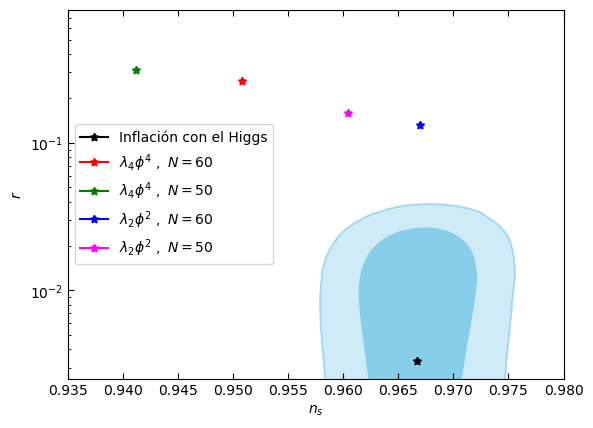

In [35]:

bck1s=np.loadtxt("bck1s.txt",float)
bck2s=np.loadtxt("bck2s.txt",float)
bck1s_n_s,bck1s_r=bck1s[:,0],bck1s[:,1]
bck2s_n_s,bck2s_r=bck2s[:,0],bck2s[:,1]

N=60
n_s_univ=1-2/N
r_univ=12/N/N


plt.plot(bck1s_n_s,bck1s_r, color="skyblue", alpha=1)
plt.fill_between(bck1s_n_s,bck1s_r, color="skyblue", alpha=1)
plt.plot(bck2s_n_s,bck2s_r, color="skyblue", alpha=0.5)
plt.fill_between(bck2s_n_s,bck2s_r, color="skyblue", alpha=0.4)
plt.yscale("log")
plt.xlim(0.935,0.98)
plt.ylim(0.0025,0.8)
plt.xlabel("$n_s$")
plt.ylabel("$r$")
plt.plot(n_s_univ,r_univ,marker=(5, 1),c='k',label="Inflación con el Higgs")
plt.plot(1-24/phi_N_4_60[-1][0]**2,128/phi_N_4_60[-1][0]**2,marker=(5, 1),c='r',label="$\lambda_4 \phi^4 \ , \ N=60$")
plt.plot(1-24/phi_N_4_50[-1][0]**2,128/phi_N_4_50[-1][0]**2,marker=(5, 1),c='g',label="$\lambda_4 \phi^4 \ , \ N=50$")
plt.plot(1-8/phi_N_2_60[-1][0]**2,32/phi_N_2_60[-1][0]**2,marker=(5, 1),c='b',label="$\lambda_2 \phi^2 \ , \ N=60$")
plt.plot(1-8/phi_N_2_50[-1][0]**2,32/phi_N_2_50[-1][0]**2,marker=(5, 1),c='fuchsia',label="$\lambda_2 \phi^2 \ , \ N=50$")
plt.legend(loc=6, prop={'size':10})
plt.tick_params(axis='y', which='both', direction='in', length=2)
plt.tick_params(axis='both', direction='in', length=4)
plt.tick_params(bottom=True,top=True)
plt.savefig('pot_4_2.pdf', bbox_inches='tight')
plt.show()